**ISP Customer Churn Analysis & Prediction**

**Problem Definition & Business Understanding**

**Business Context:** : 
Telco, a telecommunications company, provides services like internet, phone, and streaming. The company has observed a high churn rate — customers discontinuing services — which affects revenue and business growth.

**Objective** : 
To predict customer churn using historical data, so the business can take proactive measures to retain high-risk customers and reduce churn.

**Business Goal** : 
Identify which customers are likely to churn in the near future.

Understand the key factors driving churn.

Enable the marketing/retention teams to focus efforts on at-risk customers with personalized offers.

**Problem Type** : 
Classification Problem
(Target Variable: Churn → Yes/No)

**Success Metric:**
High recall (we want to catch as many churning customers as possible).

Good precision (avoid false alarms where possible).

Balanced F1-Score and ROC-AUC for model evaluation.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv('CHURN_DATASET_KAGGLE.csv')

In [23]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
df = data.copy()

In [27]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [29]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [37]:
# Convert TotalCharges to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now check how many rows became NaN
print("Missing values in 'TotalCharges':", df['TotalCharges'].isnull().sum())


Missing values in 'TotalCharges': 11


In [39]:
# Drop rows where TotalCharges is NaN
df.dropna(subset=['TotalCharges'], inplace=True)

# Reset index (good practice after dropping)
df.reset_index(drop=True, inplace=True)

# Recheck shape
df.shape


(7032, 21)

In [41]:
# Confirm data types again
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [43]:


# Set display option to show all columns
pd.set_option('display.max_columns', None)

# Now display the DataFrame (e.g., first 5 rows)
df.head(2)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [47]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Feature Descriptions:

customerID: Unique identifier for each customer.

gender: Gender of the customer — Male or Female.

SeniorCitizen: Indicates if the customer is a senior citizen (1 = Yes, 0 = No).

Partner: Whether the customer has a partner (Yes or No).

Dependents: Whether the customer has dependents (Yes or No).

tenure: Number of months the customer has stayed with the company.

PhoneService: Whether the customer has phone service (Yes or No).

MultipleLines: Indicates if the customer has multiple phone lines (Yes, No, or No phone service).

InternetService: Type of internet service — DSL, Fiber optic, or No.

OnlineSecurity: Whether the customer has online security (Yes, No, or No internet service).

OnlineBackup: Whether the customer has online backup (Yes, No, or No internet service).

DeviceProtection: Whether the customer has device protection (Yes, No, or No internet service).

TechSupport: Whether the customer has tech support (Yes, No, or No internet service).

StreamingTV: Whether the customer has streaming TV (Yes, No, or No internet service).

StreamingMovies: Whether the customer has streaming movies (Yes, No, or No internet service).

Contract: Type of contract — Month-to-month, One year, or Two year.

PaperlessBilling: Whether the customer has opted for paperless billing (Yes or No).

PaymentMethod: How the customer pays — Electronic check, Mailed check, Bank transfer, or Credit card.

MonthlyCharges: The amount charged to the customer every month.

TotalCharges: The total amount charged to the customer till date.

Churn: Target variable — whether the customer has left the company (Yes or No).



Churn
No     5163
Yes    1869
Name: count, dtype: int64

Churn Distribution in %:
 Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


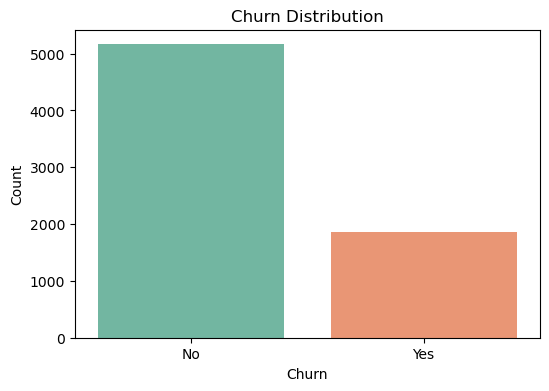

In [49]:
# Distribution of target variable
print(df['Churn'].value_counts())
print("\nChurn Distribution in %:\n", df['Churn'].value_counts(normalize=True) * 100)


plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


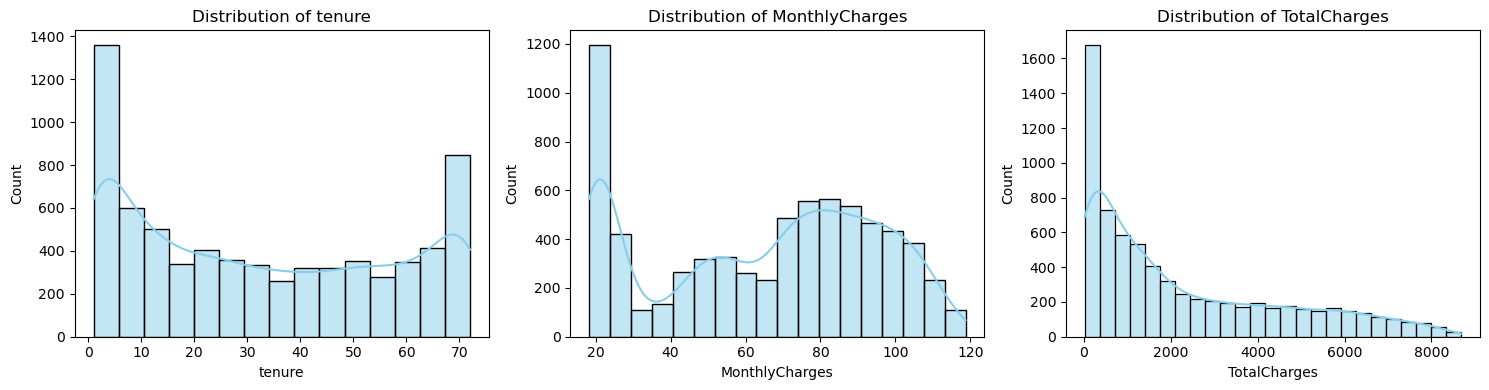

In [51]:
# Visualizing numerical features
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


Observation about Distribution:
After plotting the histograms of numerical features, it was observed that none of the features are normally distributed.

Specifically, the TotalCharges feature is right-skewed (positively skewed):

Majority of customers have lower total charges.

Only a few customers have very high total charges, stretching the tail toward the right.

**Boxplot**

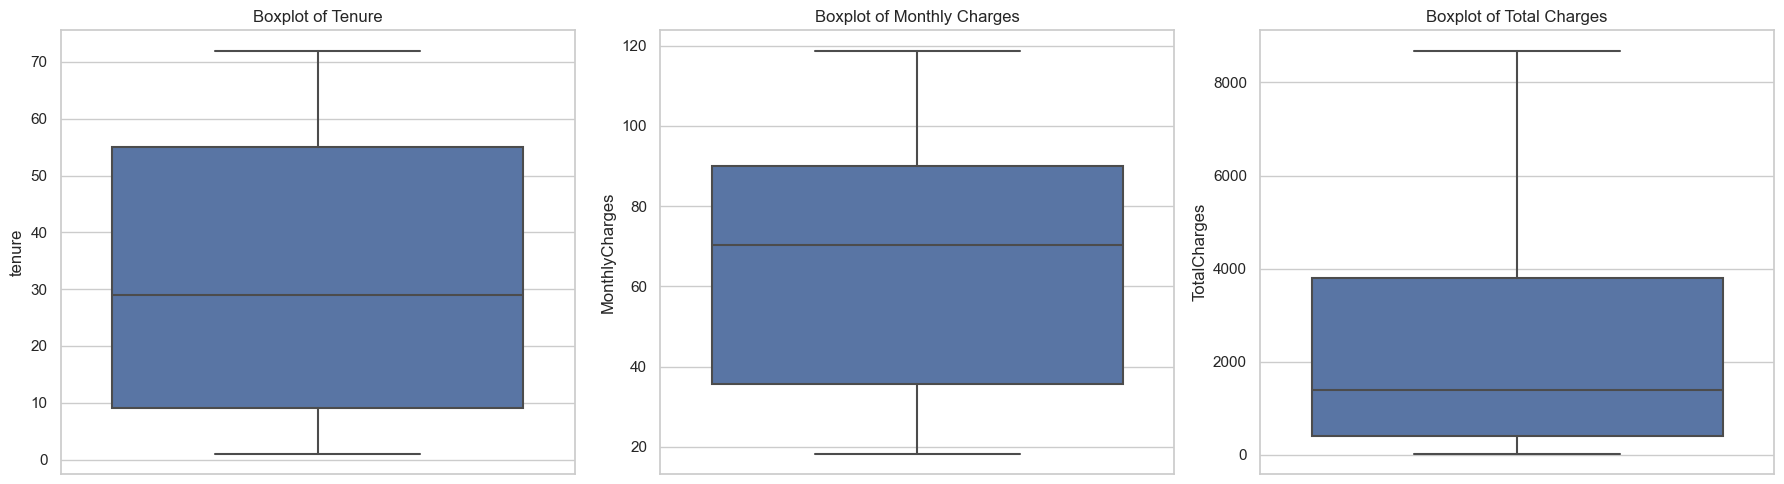

In [54]:

# Set the style for better visuals
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(18, 5))

# Boxplot for tenure
plt.subplot(1, 3, 1)
sns.boxplot(y=df['tenure'])
plt.title('Boxplot of Tenure')

# Boxplot for MonthlyCharges
plt.subplot(1, 3, 2)
sns.boxplot(y=df['MonthlyCharges'])
plt.title('Boxplot of Monthly Charges')

# Boxplot for TotalCharges
plt.subplot(1, 3, 3)
sns.boxplot(y=df['TotalCharges'])
plt.title('Boxplot of Total Charges')

plt.tight_layout()
plt.show()


Summary of Boxplot Analysis:

tenure, MonthlyCharges, and TotalCharges have no significant outliers.

No need for outlier treatment like IQR capping or Z-score filtering.


Skewness

C:\Users\abhiw\AppData\Local\Temp\ipykernel_23856\1645657220.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


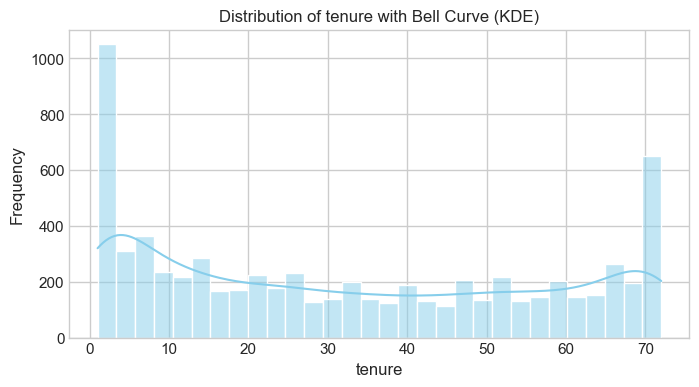

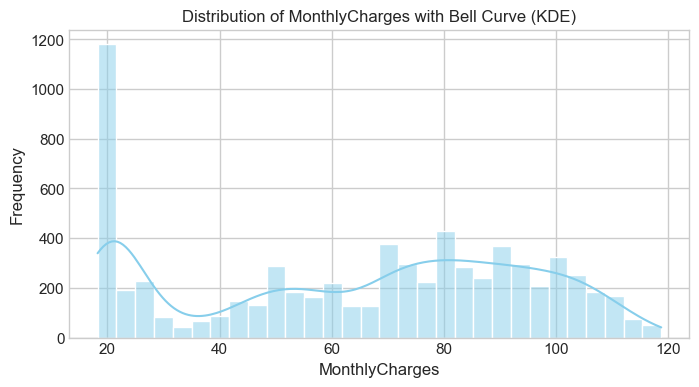

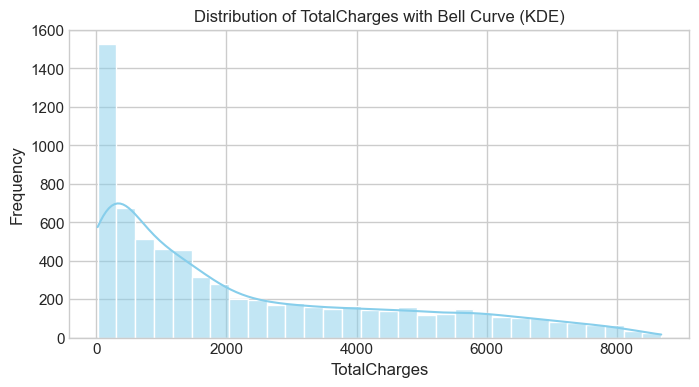

In [59]:
# List of numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Set plot style
plt.style.use('seaborn-whitegrid')

# Plotting
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col} with Bell Curve (KDE)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [61]:
# Measure skewness
df[['tenure', 'MonthlyCharges', 'TotalCharges']].skew()


tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

In [67]:
df['TotalCharges_log'] = np.log(df['TotalCharges'])


In [69]:
# Measure skewness
df[['tenure', 'MonthlyCharges', 'TotalCharges']].skew()

tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

We examined the skewness of three continuous features: tenure, MonthlyCharges, and TotalCharges. Both tenure (skewness ≈ 0.24) and MonthlyCharges (≈ -0.22) were roughly symmetric and required no transformation. TotalCharges had a moderate right skew (≈ 0.96), and a log transformation was attempted to reduce it. However, the transformation did not significantly change the distribution, suggesting that the skewness might not be severe enough to warrant correction or that a different transformation (e.g., Box-Cox or Yeo-Johnson) may be more appropriate. Given this, and unless model performance indicates a need for transformation, we retained the original TotalCharges values for now.

Univariate Analysis for Categorical Features

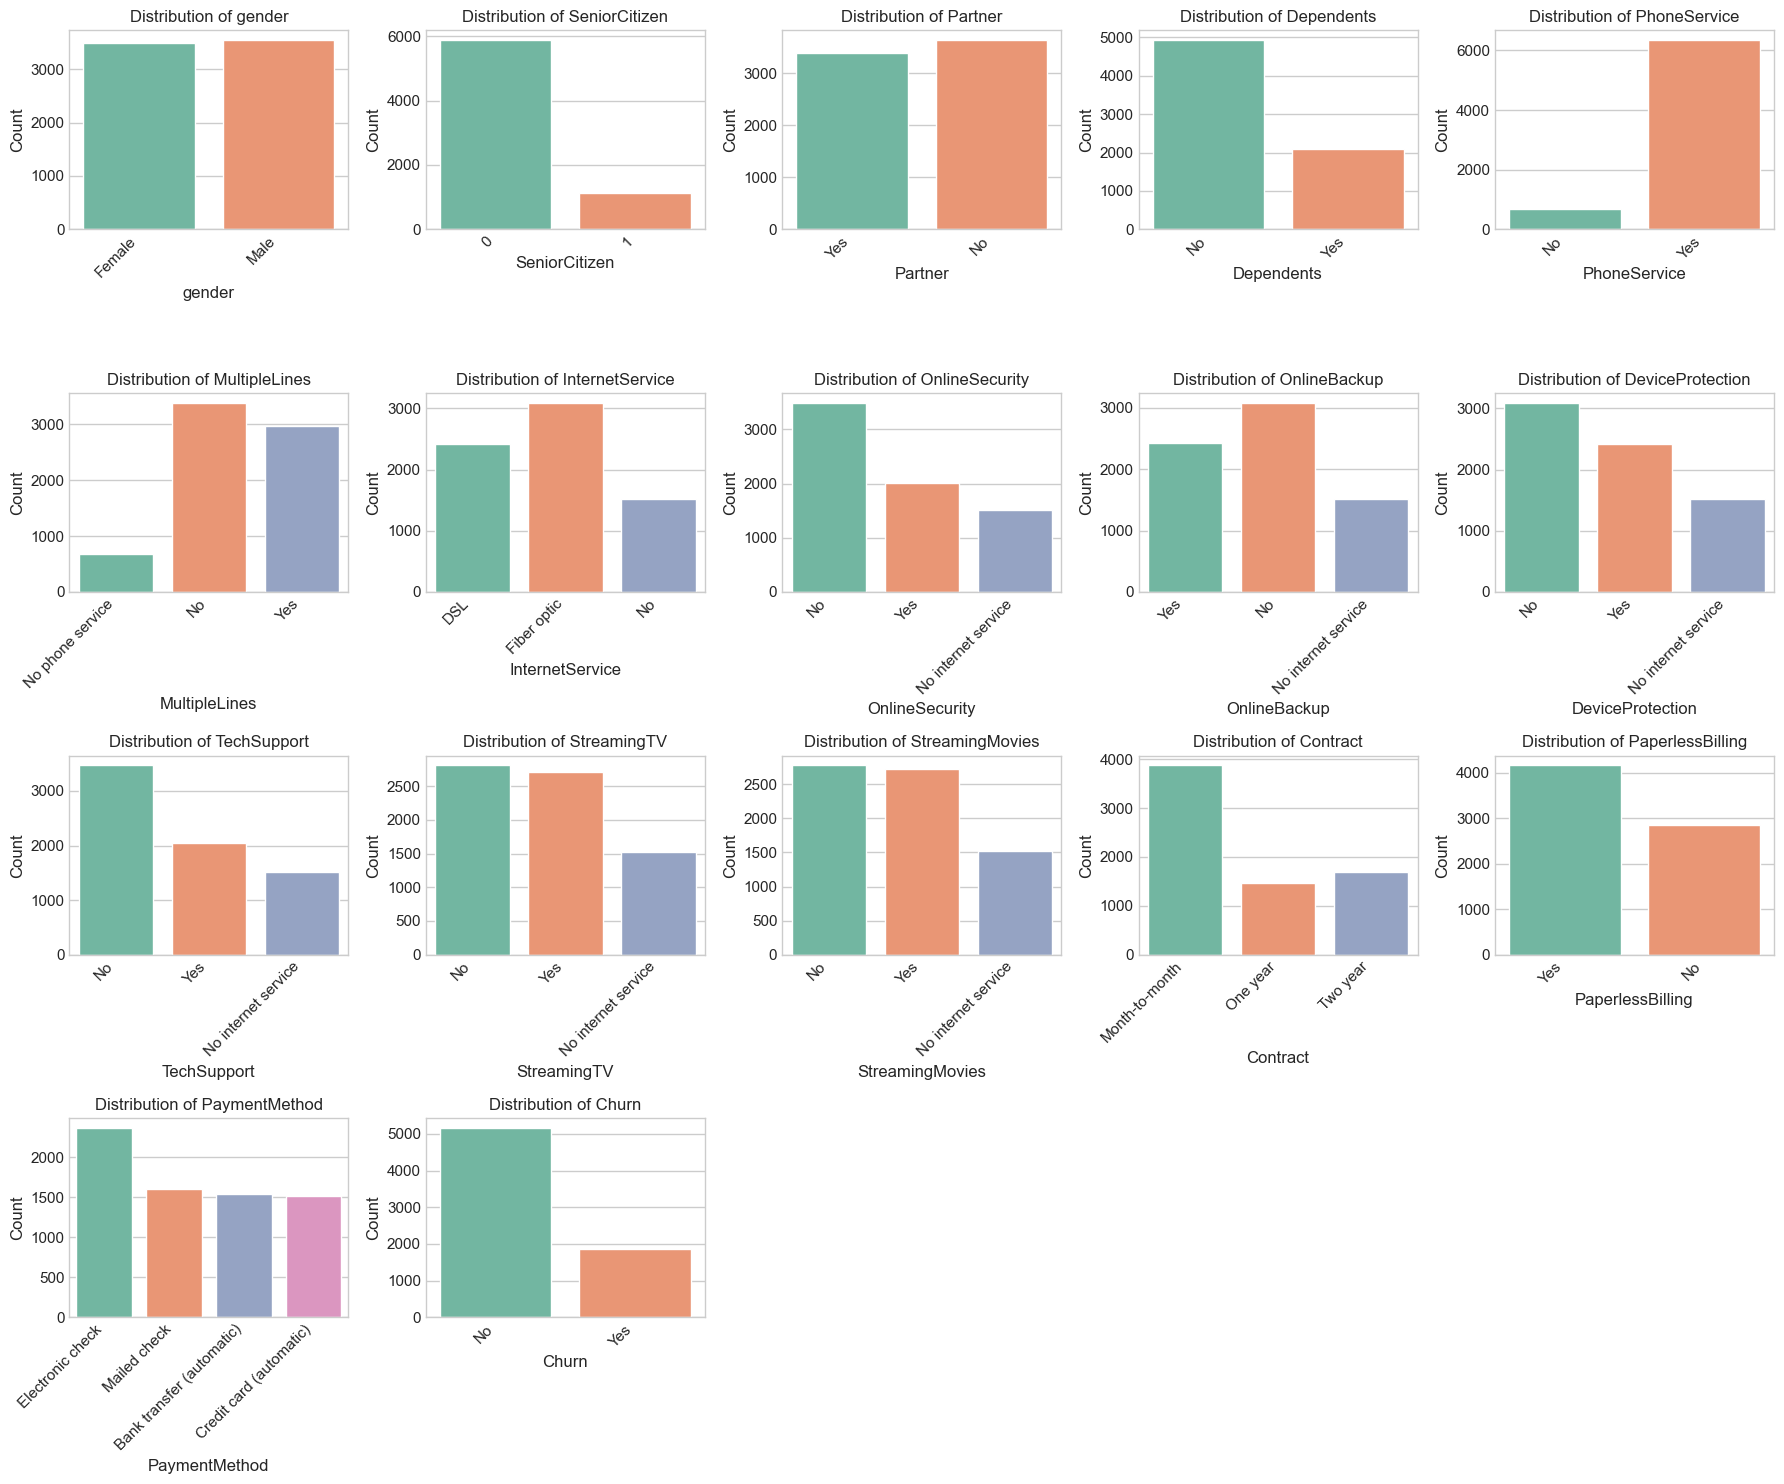

In [85]:
# List of categorical columns
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                       'PhoneService', 'MultipleLines', 'InternetService', 
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 
                       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Set up the figure size
plt.figure(figsize=(18, 15))  # Adjusted the overall figure size

# Plotting count plots for each categorical column
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 5, i)  # 4 rows, 5 columns, position i
    sns.countplot(x=df[column], palette='Set2')  # Count plot for categorical data
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    
    # Rotate the x-axis labels to avoid overlap
    plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees

# Adjust layout
plt.tight_layout()
plt.show()


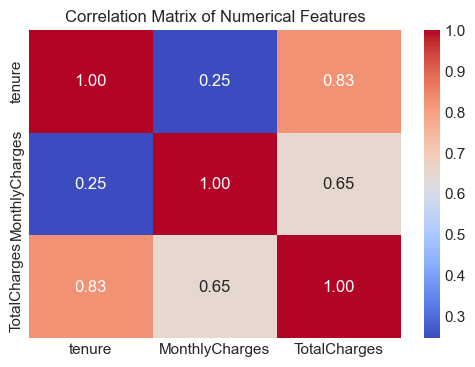

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


Correlation Analysis Between Numerical Features
tenure vs. MonthlyCharges

Correlation Coefficient: ~0.05

Interpretation: Very weak positive correlation. This suggests that as a customer’s tenure increases, their monthly charges do not significantly increase or decrease. These two variables are mostly independent.

tenure vs. TotalCharges

Correlation Coefficient: ~0.83

Interpretation: Strong positive correlation. This is expected because customers who have stayed longer are likely to have accumulated more total charges over time.

MonthlyCharges vs. TotalCharges

Correlation Coefficient: ~0.65

Interpretation: Moderate positive correlation. Higher monthly charges generally contribute to higher total charges, but the relationship isn't perfect, possibly due to variations in tenure.

**Bivariate Analysis with Target (Churn)**

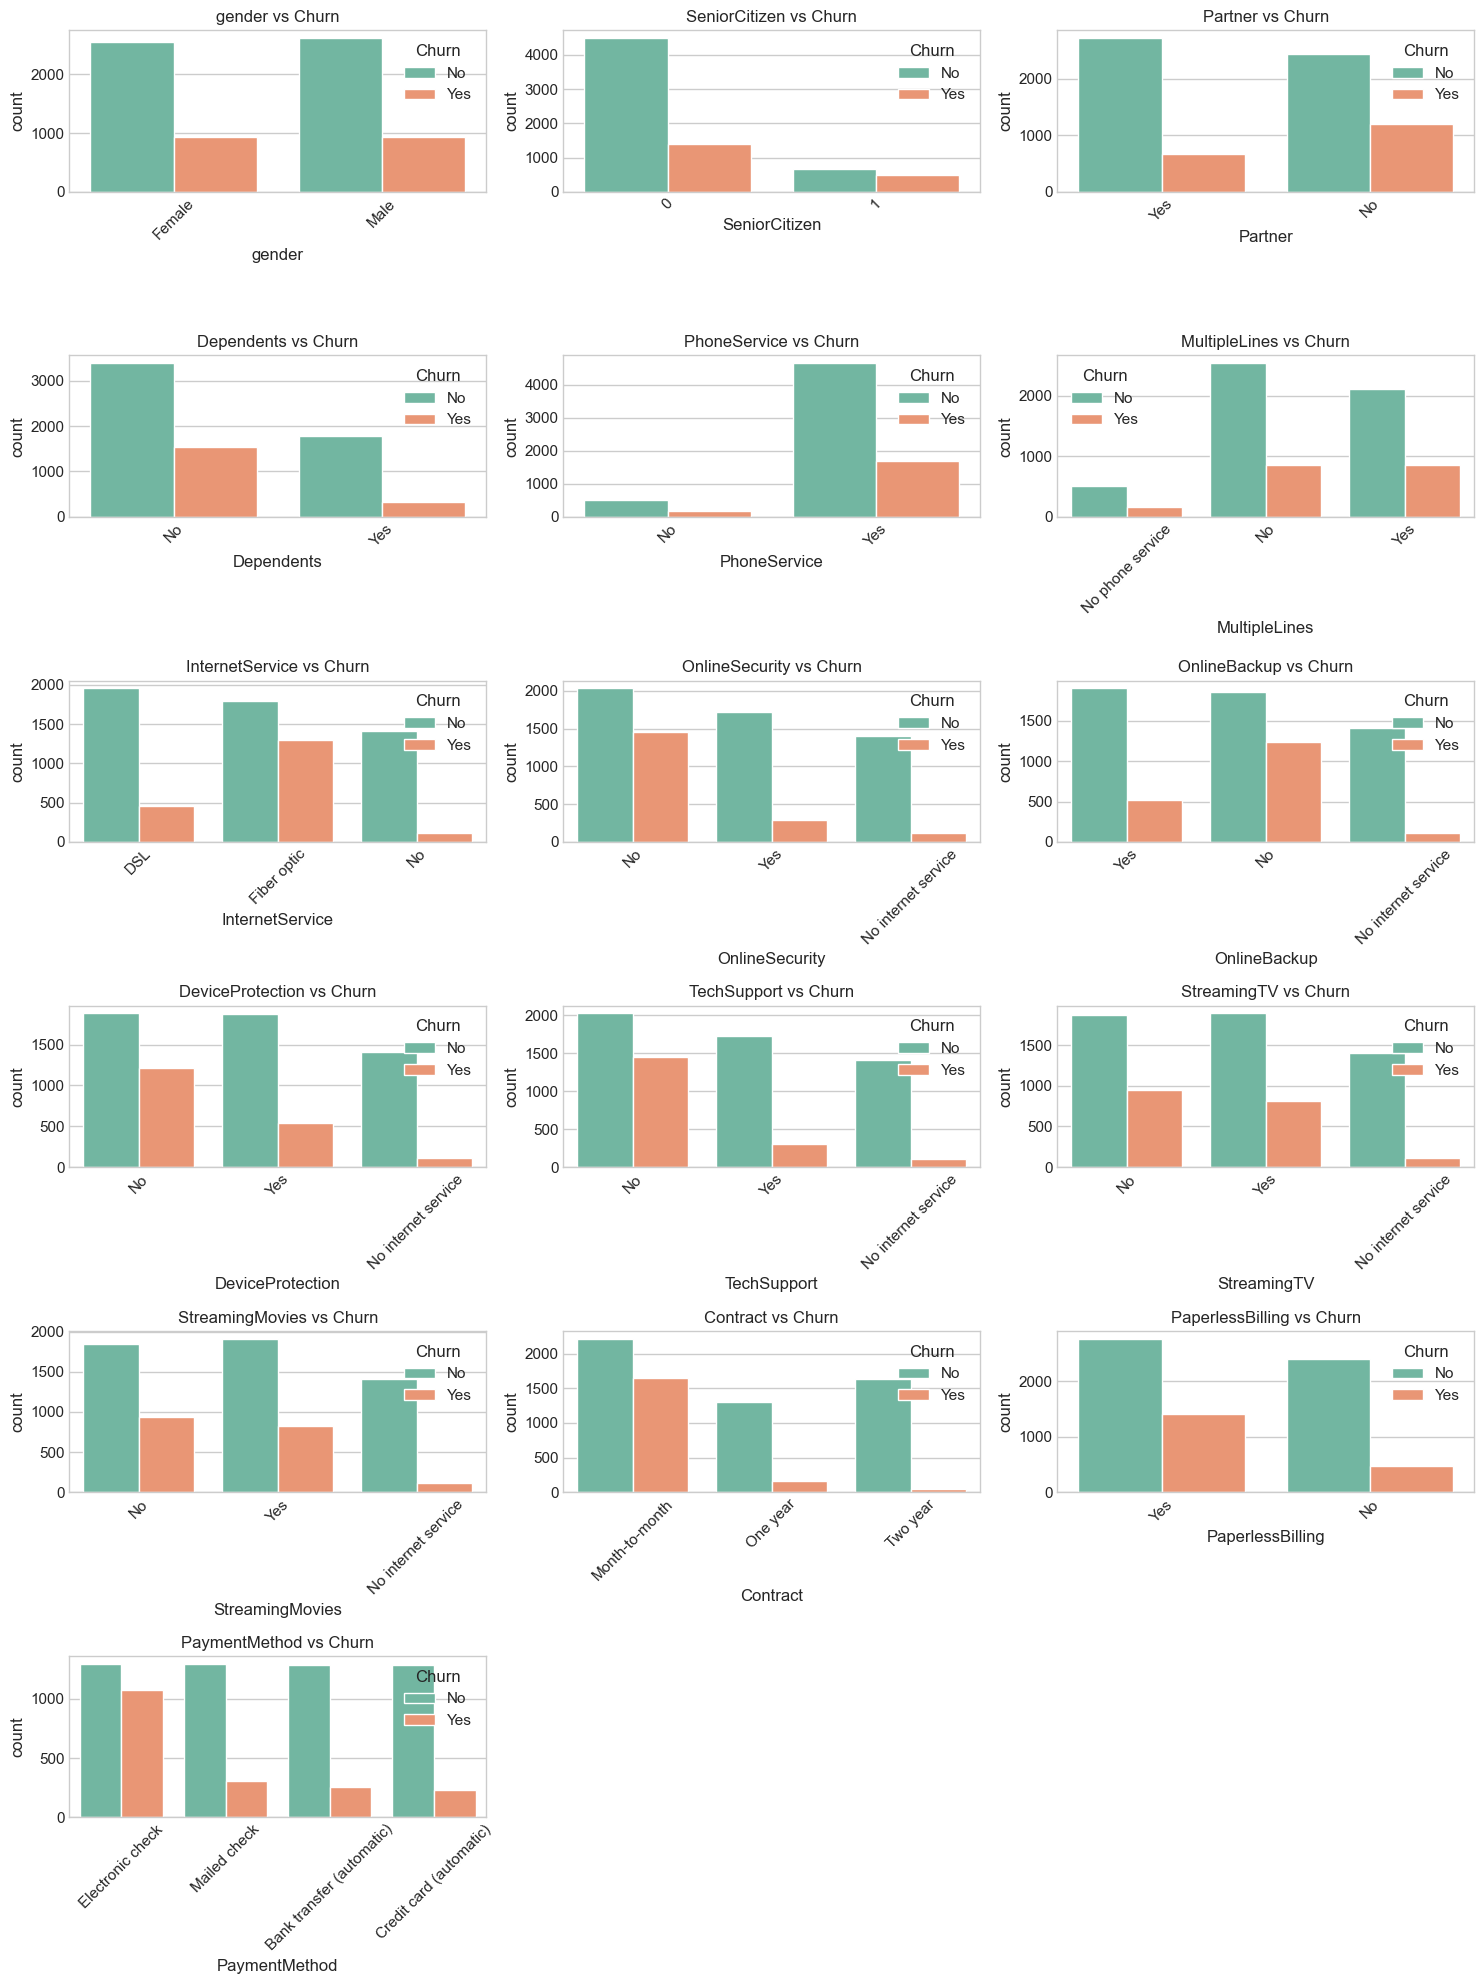

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

# Plotting countplots for each categorical variable against 'Churn'
plt.figure(figsize=(15, 20))  # Adjusted figure size to accommodate all subplots
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6, 3, i)  # Create subplots (6 rows, 3 columns)
    sns.countplot(x=col, hue='Churn', data=df, palette='Set2')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Relationship between numerical features and the target variable Churn**

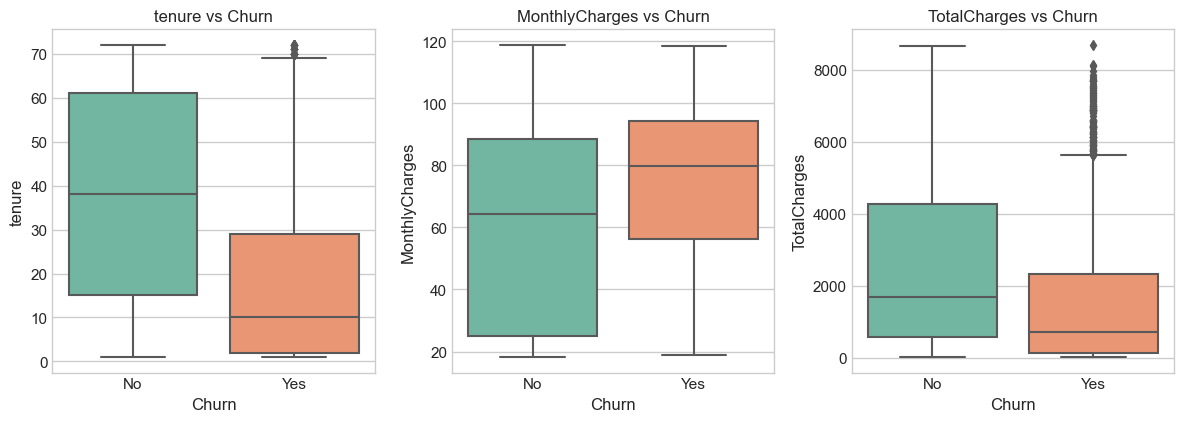

In [102]:
# List of numerical columns to analyze
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create subplots for each numerical feature
plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)  # Create a 2x3 grid of subplots
    sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
    plt.title(f'{col} vs Churn')

plt.tight_layout()
plt.show()

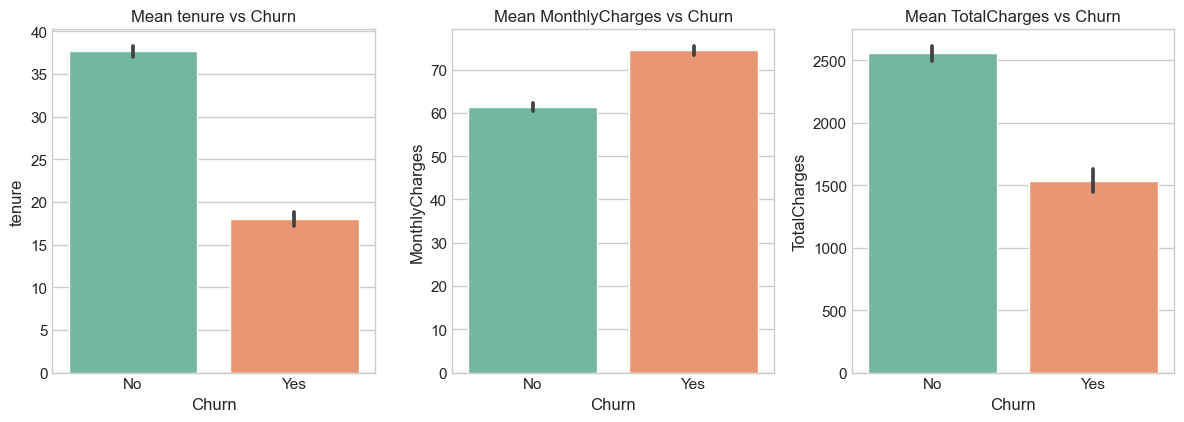

In [106]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Churn', y=col, data=df, palette='Set2')
    plt.title(f'Mean {col} vs Churn')

plt.tight_layout()
plt.show()


In [108]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
TotalCharges_log    float64
dtype: object

Dropping the customerID column

The customerID column is an identifier, which means it doesn't provide useful information for prediction. It's just a unique identifier for each row, so we can safely remove it from the dataset.

In [110]:
df.drop(columns=["customerID"],inplace=True)

In [112]:
df.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'TotalCharges_log'],
      dtype='object')

In [114]:
# Check unique values for each object-type (categorical) column
for col in df.select_dtypes(include='object').columns:
    print(f"{col}:")
    print(df[col].unique())
    print("-" * 40)


gender:
['Female' 'Male']
----------------------------------------
Partner:
['Yes' 'No']
----------------------------------------
Dependents:
['No' 'Yes']
----------------------------------------
PhoneService:
['No' 'Yes']
----------------------------------------
MultipleLines:
['No phone service' 'No' 'Yes']
----------------------------------------
InternetService:
['DSL' 'Fiber optic' 'No']
----------------------------------------
OnlineSecurity:
['No' 'Yes' 'No internet service']
----------------------------------------
OnlineBackup:
['Yes' 'No' 'No internet service']
----------------------------------------
DeviceProtection:
['No' 'Yes' 'No internet service']
----------------------------------------
TechSupport:
['No' 'Yes' 'No internet service']
----------------------------------------
StreamingTV:
['No' 'Yes' 'No internet service']
----------------------------------------
StreamingMovies:
['No' 'Yes' 'No internet service']
----------------------------------------
Contract:
['Mont

Clean Up Inconsistent or Redundant Categorical Values

In [116]:
# Replace 'No internet service' with 'No'
internet_dependent_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                           'TechSupport', 'StreamingTV', 'StreamingMovies']
df[internet_dependent_cols] = df[internet_dependent_cols].replace({'No internet service': 'No'})

# Replace 'No phone service' with 'No'
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})


Clean Redundant Categories in Categorical Features

Several columns contained values like "No internet service" and "No phone service" which were semantically equivalent to "No". To simplify the data and avoid misleading the model, we replaced these values with "No" across relevant features. This step ensures consistent and minimal categorical levels, which improves model performance and interpretability.

In [44]:
#check again after cleaning 

In [118]:
# Check unique values for each object-type (categorical) column
for col in df:
    print(f"{col}:")
    print(df[col].unique())
    print("-" * 40)


gender:
['Female' 'Male']
----------------------------------------
SeniorCitizen:
[0 1]
----------------------------------------
Partner:
['Yes' 'No']
----------------------------------------
Dependents:
['No' 'Yes']
----------------------------------------
tenure:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
----------------------------------------
PhoneService:
['No' 'Yes']
----------------------------------------
MultipleLines:
['No' 'Yes']
----------------------------------------
InternetService:
['DSL' 'Fiber optic' 'No']
----------------------------------------
OnlineSecurity:
['No' 'Yes']
----------------------------------------
OnlineBackup:
['Yes' 'No']
----------------------------------------
DeviceProtection:
['No' 'Yes']
----------------------------------------
TechSupport:
['No' 'Yes']
---------------

In [120]:
# Binary mapping
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

# Replace Yes/No and Male/Female with 1/0
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})


In [122]:
multi_cat_cols = ['InternetService', 'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)


In [124]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotalCharges_log,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,3.396185,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,7.544068,False,False,True,False,False,False,True


In [126]:
# Check unique values for each object-type (categorical) column
for col in df:
    print(f"{col}:")
    print(df[col].unique())
    print("-" * 40)


gender:
[0 1]
----------------------------------------
SeniorCitizen:
[0 1]
----------------------------------------
Partner:
[1 0]
----------------------------------------
Dependents:
[0 1]
----------------------------------------
tenure:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
----------------------------------------
PhoneService:
[0 1]
----------------------------------------
MultipleLines:
[0 1]
----------------------------------------
OnlineSecurity:
[0 1]
----------------------------------------
OnlineBackup:
[1 0]
----------------------------------------
DeviceProtection:
[0 1]
----------------------------------------
TechSupport:
[0 1]
----------------------------------------
StreamingTV:
[0 1]
----------------------------------------
StreamingMovies:
[0 1]
----------------------------------------
Pap

**Encoding Categorical Variables**

In this step, we transformed all categorical features into numerical format to prepare the dataset for machine learning models, which typically require numerical inputs.

✅ Binary Label Encoding:
We applied label encoding to all features with only two unique categories, converting "Yes"/"No" or "Male"/"Female" into 1/0 for better model understanding.

One-Hot Encoding for Multi-Class Features:
For features with more than two categories, we used One-Hot Encoding to avoid introducing false ordinal relationships. We set drop_first=True to prevent multicollinearity.

**Feature Scaling**

🎯 Objective:
To bring all numerical features onto a similar scale, especially important for distance-based algorithms (like KNN or SVM) and to ensure faster convergence in gradient-based models (like Logistic Regression).

🧪 Columns to Scale:
We scale only the continuous numeric features, not binary or one-hot encoded features. In this dataset:

tenure

MonthlyCharges

TotalCharges

In [128]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Columns to scale
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Fit and transform
df[num_cols] = scaler.fit_transform(df[num_cols])


**Train-Test Split**

In [130]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape
print("Training Set:", X_train.shape)
print("Test Set:", X_test.shape)


Training Set: (5625, 24)
Test Set: (1407, 24)


Train-Test Split: To evaluate the performance of our churn prediction model on unseen data, we split the dataset into training and testing sets using an 80-20 split. Stratified sampling was applied to ensure the target class ('Churn') maintains the same distribution in both sets. This approach prevents data leakage and supports fair model evaluation.



**Model Building**

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize the models
log_reg = LogisticRegression( max_iter=1000,random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

# Train the models
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.7882
Confusion Matrix:
[[921 112]
 [186 188]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



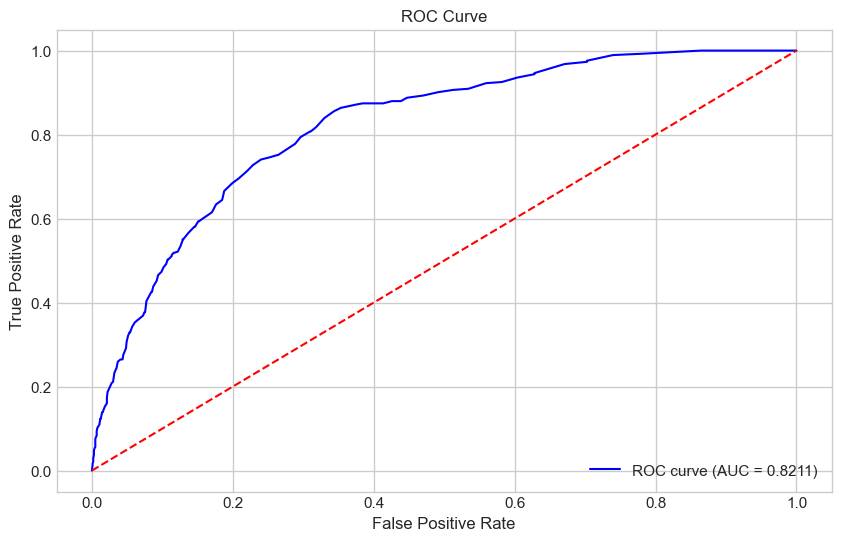

AUC: 0.8211


In [141]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Make predictions
y_pred = rf_classifier.predict(X_test)

# Step 2: Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Step 3: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Step 4: Classification Report (Precision, Recall, F1-Score)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Step 5: ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Print AUC score
print(f"AUC: {roc_auc:.4f}")


1. Accuracy: 0.7882 :
The model correctly predicts the outcome approximately 79% of the time.

2. Confusion Matrix:

[[921 112]  
 [186 188]]
True Negatives (TN): 921 (Non-churn customers correctly predicted as non-churn).

False Positives (FP): 112 (Non-churn customers incorrectly predicted as churn).

False Negatives (FN): 186 (Churn customers incorrectly predicted as non-churn).

True Positives (TP): 188 (Churn customers correctly predicted as churn).

3. Classification Report:
For Churn (Class 1):

Precision: 0.63 (Out of all customers predicted as churn, 63% were actually churn.)

Recall: 0.50 (Out of all actual churn customers, the model correctly identified 50%.)

F1-Score: 0.56 (Harmonic mean of precision and recall. Shows the balance between them.)

For Non-Churn (Class 0):

Precision: 0.83 (Out of all customers predicted as non-churn, 83% were actually non-churn.)

Recall: 0.89 (Out of all actual non-churn customers, the model correctly identified 89%.)

F1-Score: 0.86 (Good balance between precision and recall for non-churn customers.)

Overall Metrics:

Accuracy: 0.79 (As stated earlier, overall correctness of predictions.)

Macro Avg (unweighted average):

Precision: 0.73

Recall: 0.70

F1-Score: 0.71

Weighted Avg:

Precision: 0.78

Recall: 0.79

F1-Score: 0.78

Key Takeaways:
High Precision for Non-Churn: The model is very good at identifying non-churn customers correctly (precision of 0.83), but it struggles more with churn customers (precision of 0.63).

Recall Issues for Churn: The recall for churn customers is lower (0.50), meaning the model is missing a significant number of churn customers. This is a common problem when dealing with imbalanced classes.

F1-Score for Churn: With an F1-score of 0.56, the model's balance of precision and recall for churn is not optimal. This could be improved by tuning the model or handling the imbalance.